In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import Experiment

In [3]:
%matplotlib inline

In [4]:
config = 'config.yaml'
exp = Experiment(config)

Seed: 0


In [5]:
x0 = exp.generate_data(mu_inj=0, n=10000)
x1 = exp.generate_data(mu_inj=1, n=10000)

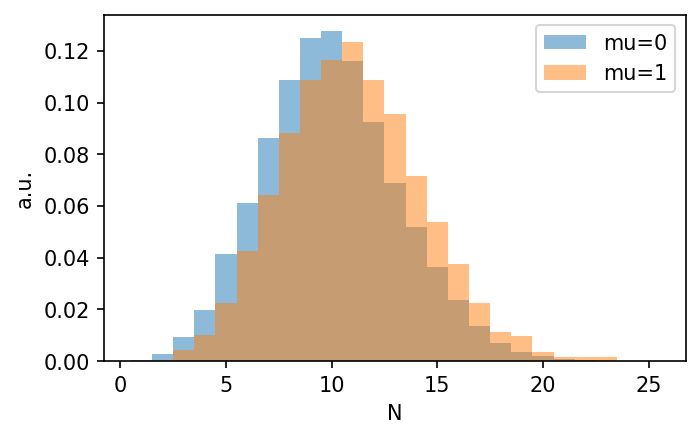

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)

n_max = max(x0.max(), max(x1).max())
integer_bins = np.linspace(0, n_max, n_max+1) + 0.5
ax.hist(x0.flatten(), bins=integer_bins, alpha=0.5, label='mu=0', density=True)
ax.hist(x1.flatten(), bins=integer_bins, alpha=0.5, label='mu=1', density=True)
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('a.u.')
plt.show()

In [8]:
mu_scan = np.linspace(0, 10, 20)
exp.get_q_distributions(mu_scan, n=1000)

100%|██████████| 20/20 [00:00<00:00, 5452.81it/s]


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_25195/2714451292.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.hist(exp.q_distributions[mu_scan[i]], label='$\mu_{inj}$=' + f'{mu_scan[i]:.2f}', bins=bins, alpha=0.5, density=True)
/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_25195/2714451292.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


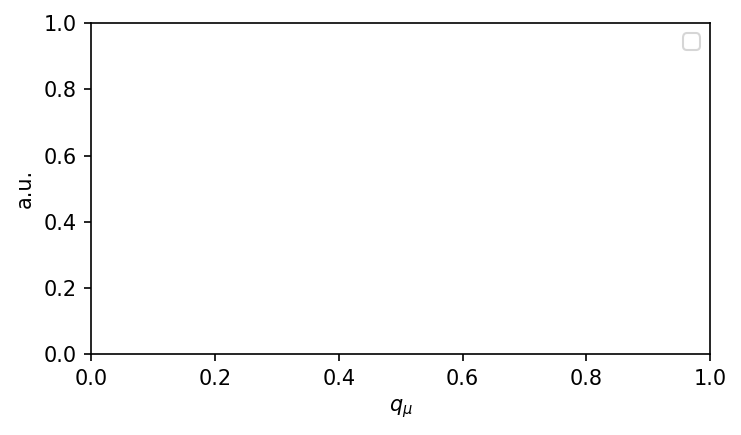

In [9]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)
bins = np.linspace(0, 1, 40)

# Initialize the plot
def init():
    ax.clear()
    ax.set_xlabel('$q_{\\mu}$')
    ax.set_ylabel('a.u.')
    ax.legend()
    return ax,

# Update function for each frame
def update(i):
    ax.clear()
    ax.hist(exp.q_distributions[mu_scan[i]], label='$\mu_{inj}$=' + f'{mu_scan[i]:.2f}', bins=bins, alpha=0.5, density=True)
    ax.set_xlabel('$q_{\\mu=' + f'{exp.mu:.2f}' + '}$')
    ax.set_ylabel('a.u.')
    ax.set_ylim(0, 50)
    ax.set_xlim(bins[0], bins[-1])
    ax.legend()
    plt.tight_layout()
    return ax,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(mu_scan), init_func=init, blit=False)

# Display the animation
HTML(ani.to_jshtml())

In [23]:
q_hat = 0.1
result = exp.get_upper_limit(q_hat)

In [24]:
result

{'mu_upper_limit': 8.954545454545455,
 'p_mu_null': 0.32299999999999995,
 'p_mu_alt': array([0.625, 0.588, 0.507, 0.448, 0.38 , 0.351, 0.3  , 0.255, 0.208,
        0.155, 0.127, 0.124, 0.101, 0.07 , 0.057, 0.043, 0.034, 0.023,
        0.024]),
 'mu_inj_alt': array([ 0.52631579,  1.05263158,  1.57894737,  2.10526316,  2.63157895,
         3.15789474,  3.68421053,  4.21052632,  4.73684211,  5.26315789,
         5.78947368,  6.31578947,  6.84210526,  7.36842105,  7.89473684,
         8.42105263,  8.94736842,  9.47368421, 10.        ]),
 'CLs': array([0.92319055, 0.86853767, 0.74889217, 0.66174298, 0.56129985,
        0.51846381, 0.44313146, 0.37666174, 0.30723781, 0.22895126,
        0.18759232, 0.183161  , 0.14918759, 0.10339734, 0.08419498,
        0.06351551, 0.05022157, 0.03397341, 0.03545052])}

(<Figure size 750x450 with 1 Axes>,
 <Axes: xlabel='$q_{inj}$', ylabel='$p_{\\mu=0.00}$'>)

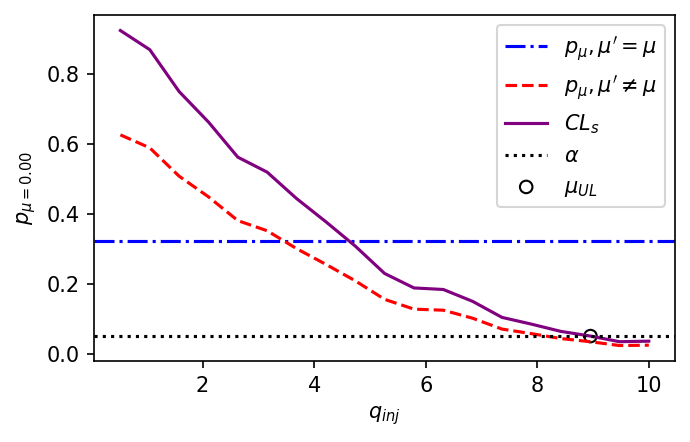

In [ ]:
exp.plot_single_limit(result)

In [28]:
limits = []
sigmas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

for sigma in sigmas:
    exp = Experiment(config)
    exp.bkg_sigma = sigma
    exp.get_q_distributions()
    result = exp.get_upper_limit(q_hat)
    limits.append(result['mu_upper_limit'])

Seed: 0


100%|██████████| 40/40 [00:00<00:00, 866.93it/s]


Seed: 0


100%|██████████| 40/40 [00:46<00:00,  1.16s/it]


Seed: 0


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


Seed: 0


100%|██████████| 40/40 [00:44<00:00,  1.12s/it]


Seed: 0


100%|██████████| 40/40 [00:43<00:00,  1.10s/it]


Seed: 0


100%|██████████| 40/40 [00:44<00:00,  1.12s/it]


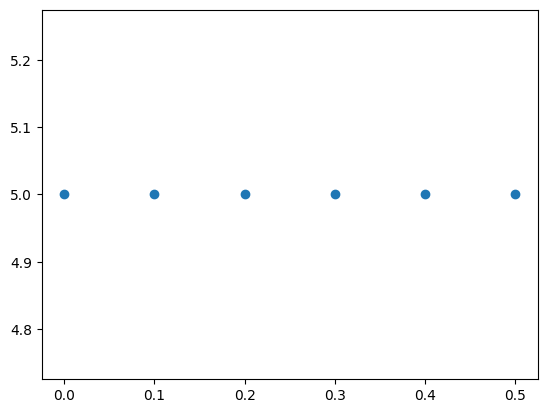

In [29]:
plt.scatter(sigmas, limits)